In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('../data/historical_data/3c - Indicator prices.csv')

In [3]:
data.head()

,ICO composite and group indicator prices (annual and monthly averages),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,In US cents/lb,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990,71.53,96.53,89.46,82.97,53.60,NaN


In [4]:
# set the 3rd row as the header
data.columns = data.iloc[2,]

In [5]:
# drop first rows 
data = data[4:]

In [6]:
# drop last column
data = data.iloc[:,:6]

In [7]:
# renaming the first column as 'date'
data.rename(columns = {np.nan: 'date'}, inplace=True)

In [8]:
data.dtypes

2
date                       object
ICO composite indicator    object
Colombian\n Milds          object
Other Milds                object
Brazilian\n Naturals       object
Robustas                   object
dtype: object

In [9]:
data.isnull().sum()

2
date                       31
ICO composite indicator    32
Colombian\n Milds          32
Other Milds                32
Brazilian\n Naturals       32
Robustas                   32
dtype: int64

In [10]:
# reset the index
data.reset_index(drop=True, inplace=True)

In [11]:
data.head(15)

2,date,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas
0,1990,71.53,96.53,89.46,82.97,53.60
1,January,62.75,82.07,76.02,70.36,49.47
2,February,67.01,91.55,83.95,77.59,50.06
3,March,75.25,103.24,94.73,86.17,55.76
4,April,75.34,101.79,94.71,87.45,55.95
5,May,73.30,99.14,92.97,86.31,53.62
6,June,69.91,96.01,89.15,82.94,50.67
7,July,68.36,92.45,86.65,78.94,50.07
8,August,74.10,103.30,94.43,90.25,53.78
9,September,75.55,102.21,95.39,92.20,55.70


In [12]:
# drop last 3 rows
data = data.iloc[:419, ]

In [13]:
data['date'].value_counts()

June         30
March        30
July         30
May          30
April        30
January      30
August       30
September    30
December     30
February     30
November     30
October      30
2002          1
2019          1
2016          1
1996          1
2006          1
1990          1
2005          1
2004          1
2012          1
2007          1
2001          1
1994          1
2014          1
1991          1
2000          1
2008          1
2017          1
2003          1
2015          1
1993          1
2011          1
1992          1
2013          1
1995          1
1998          1
1999          1
2018          1
2009          1
1997          1
2010          1
Name: date, dtype: int64

In [14]:
# years go from 1990 to 2019
list(data['date'].unique())

['1990',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 nan,
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [15]:
data[data['date']=='1990']

2,date,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas
0,1990,71.53,96.53,89.46,82.97,53.60


In [16]:
data.head(14)

2,date,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas
0,1990,71.53,96.53,89.46,82.97,53.60
1,January,62.75,82.07,76.02,70.36,49.47
2,February,67.01,91.55,83.95,77.59,50.06
3,March,75.25,103.24,94.73,86.17,55.76
4,April,75.34,101.79,94.71,87.45,55.95
5,May,73.30,99.14,92.97,86.31,53.62
6,June,69.91,96.01,89.15,82.94,50.67
7,July,68.36,92.45,86.65,78.94,50.07
8,August,74.10,103.30,94.43,90.25,53.78
9,September,75.55,102.21,95.39,92.20,55.70


In [17]:
# iterate through each row in the data frame
for row in range(data.shape[0]):
    
    # try first to convert the first column into an integer - this works only when this is a year
    # the month names and NaN's will fail to be converted to integers, thus sending the loop to the except
    # statement that will continue with the next row
    try:
        int(data.loc[row, 'date'])
        
        # take only the portion of the data that belongs to that year
        df = data.iloc[row:row+13, :]
        # take the year we are currently working on
        year = data.loc[row, 'date']
        # print loop progress
        print(f'Processing year: {year} ...')
        
        # change the date column to contain the year and the month
        df['date'] = str(year) + '-' + df['date']
        
        # drop the first row that is the year's average
        df = df[1:]
        
        # save temporarily to a folder the data for that specific year
        df.to_csv(f'../data/historical_data/tmp/{year}.csv', index=False)
        
        # print loop progress
        print('... done.')

    except:
        continue

Processing year: 1990 ...
... done.
Processing year: 1991 ...
... done.
Processing year: 1992 ...
... done.
Processing year: 1993 ...
... done.
Processing year: 1994 ...
... done.
Processing year: 1995 ...
... done.
Processing year: 1996 ...
... done.
Processing year: 1997 ...
... done.
Processing year: 1998 ...
... done.
Processing year: 1999 ...
... done.
Processing year: 2000 ...
... done.
Processing year: 2001 ...
... done.
Processing year: 2002 ...
... done.
Processing year: 2003 ...
... done.
Processing year: 2004 ...
... done.
Processing year: 2005 ...
... done.
Processing year: 2006 ...
... done.
Processing year: 2007 ...
... done.
Processing year: 2008 ...
... done.
Processing year: 2009 ...
... done.
Processing year: 2010 ...
... done.
Processing year: 2011 ...
... done.
Processing year: 2012 ...
... done.
Processing year: 2013 ...
... done.
Processing year: 2014 ...
... done.
Processing year: 2015 ...
... done.
Processing year: 2016 ...
... done.
Processing year: 2017 ...
..

<ipython-input-17-e499f83638a8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = str(year) + '-' + df['date']


In [18]:
filelist = os.listdir('../data/historical_data/tmp')
filelist = [file for file in filelist if 'ipynb' not in file]
filelist

['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv',
 '2000.csv',
 '2001.csv',
 '2002.csv',
 '2003.csv',
 '2004.csv',
 '2005.csv',
 '2006.csv',
 '2007.csv',
 '2008.csv',
 '2009.csv',
 '2010.csv',
 '2011.csv',
 '2012.csv',
 '2013.csv',
 '2014.csv',
 '2015.csv',
 '2016.csv',
 '2017.csv',
 '2018.csv',
 '2019.csv']

In [19]:
# read the first file
data = pd.read_csv(f'../data/historical_data/tmp/{filelist[0]}')

# loop through the rest of the files
for file in filelist[1:]:
    # read the next file
    df = pd.read_csv(f'../data/historical_data/tmp/{file}')
    # concatenate to the previous files
    data = pd.concat([data, df], axis=0)

In [20]:
data.isnull().sum()

date                       0
ICO composite indicator    0
Colombian\n Milds          0
Other Milds                0
Brazilian\n Naturals       0
Robustas                   0
dtype: int64

In [21]:
data.dtypes

date                        object
ICO composite indicator    float64
Colombian\n Milds          float64
Other Milds                float64
Brazilian\n Naturals       float64
Robustas                   float64
dtype: object

In [22]:
# convert the date column to datetime type
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

In [23]:
# save the file
data.to_csv('../data/monthly_historical.csv', index=False)

---

In [2]:
data = pd.read_csv('../data/monthly_historical.csv')

In [3]:
# Arabica monthly price
data['arabicas'] = round(((data['Colombian\n Milds'] + data['Other Milds'] + data['Brazilian\n Naturals']) / 3), 2)

In [4]:
data.dtypes

date                        object
ICO composite indicator    float64
Colombian\n Milds          float64
Other Milds                float64
Brazilian\n Naturals       float64
Robustas                   float64
arabicas                   float64
dtype: object

In [5]:
data.head()

,date,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas,arabicas
0,1990-01,62.75,82.07,76.02,70.36,49.47,76.15
1,1990-02,67.01,91.55,83.95,77.59,50.06,84.36
2,1990-03,75.25,103.24,94.73,86.17,55.76,94.71
3,1990-04,75.34,101.79,94.71,87.45,55.95,94.65
4,1990-05,73.30,99.14,92.97,86.31,53.62,92.81


In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.set_index('date', inplace=True)

In [8]:
data.describe()

,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas,arabicas
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,104.604056,136.274389,129.468250,113.590944,74.351639,126.444611
std,40.678059,54.034450,51.520699,47.050788,28.872846,50.455827
min,41.170000,56.180000,52.930000,38.630000,22.810000,50.850000
25%,69.815000,92.987500,86.957500,77.995000,50.067500,85.932500
50%,103.660000,130.745000,125.355000,109.095000,76.490000,121.620000
75%,127.957500,163.325000,157.290000,136.415000,92.807500,152.595000
max,231.240000,318.500000,300.120000,273.400000,182.780000,295.490000


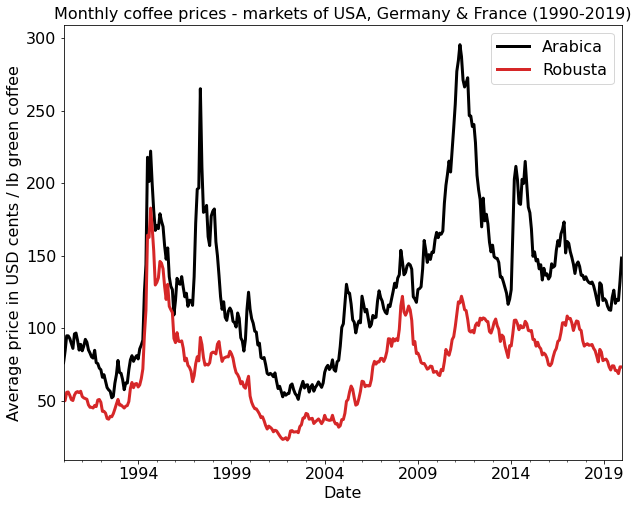

In [30]:
data['arabicas'].plot(figsize=(10,8), color='black', label='Arabica', linewidth=3);
data['Robustas'].plot(figsize=(10,8), color='tab:red', label='Robusta', linewidth=3);
plt.legend(prop={'size':16});
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.title('Monthly coffee prices - markets of USA, Germany & France (1990-2019)', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
# plt.savefig('../images/plots/monthly_prices_arabicas_robustas.jpeg');

In [27]:
data['avg'] = round(((data['arabicas'] + data['Robustas'])/2),2)

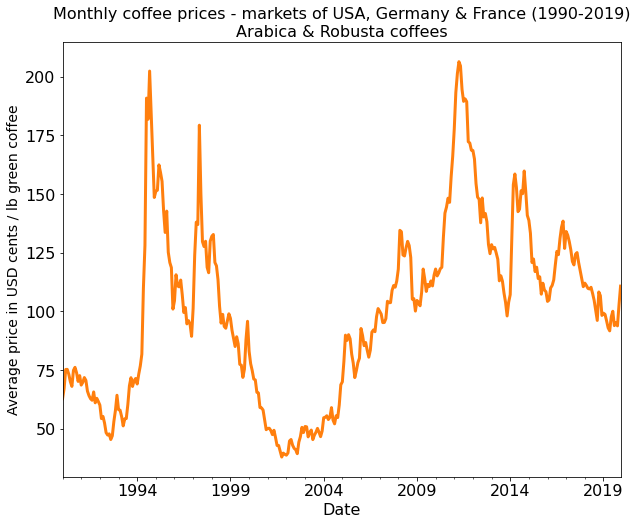

In [32]:
data['avg'].plot(figsize=(10,8), color='tab:orange', linewidth=3);
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.title('Monthly coffee prices - markets of USA, Germany & France (1990-2019)\nArabica & Robusta coffees', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
# plt.savefig('../images/plots/daily_prices_avg.jpeg');

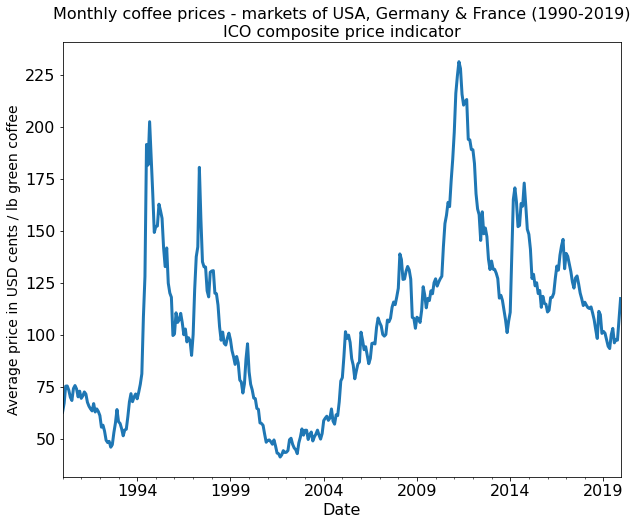

In [33]:
data['ICO composite indicator'].plot(figsize=(10,8), color='tab:blue', linewidth=3);
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.title('Monthly coffee prices - markets of USA, Germany & France (1990-2019)\nICO composite price indicator', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
# plt.savefig('../images/plots/daily_prices_ico_composite.jpeg');

---

In [9]:
# read daily_prices2 file
df = pd.read_csv('../data/daily_prices2.csv')
df.head()

,date,ICO_composite_indicator,colombian_milds,other_milds,brazilian_naturals,robustas,arabicas
0,2021-04-01,114.45,170.64,158.26,114.27,71.52,147.72
1,2021-04-02,114.22,170.09,158.10,113.74,71.59,147.31
2,2021-04-05,114.73,171.03,158.69,114.57,71.65,148.10
3,2021-04-06,117.76,176.27,163.22,119.18,71.83,152.89
4,2021-04-07,117.56,175.58,163.32,118.97,71.62,152.62


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

In [14]:
df2 = df.groupby(['month','year']).mean()

In [15]:
df2.reset_index(inplace=True)

In [16]:
df2.dtypes

month                        int64
year                         int64
ICO_composite_indicator    float64
colombian_milds            float64
other_milds                float64
brazilian_naturals         float64
robustas                   float64
arabicas                   float64
dtype: object

In [17]:
df2['year'] = df2['year'].astype(str)
df2['month'] = df2['month'].astype(str)

In [18]:
df2['date'] = np.nan

In [19]:
for row in range(df2.shape[0]):
    df2.loc[row, 'date'] = df2.loc[row,'year'] + '-' + df2.loc[row,'month']

In [20]:
df2.drop(columns=['month','year'], inplace=True)

In [21]:
df2['date'] = pd.to_datetime(df2['date'])

In [22]:
df2.set_index('date', inplace=True)

In [23]:
df2['avg'] = round(((df2['arabicas'] + df2['robustas'])/2),2)

In [24]:
df2.head()

,ICO_composite_indicator,colombian_milds,other_milds,brazilian_naturals,robustas,arabicas,avg
date,,,,,,,
2021-01-01,115.726500,173.421500,160.685000,116.691000,70.711500,150.265500,110.49
2021-02-01,119.351000,176.958500,166.429000,120.063500,73.371500,154.483000,113.93
2021-03-01,120.355652,177.489130,167.050870,122.161304,73.859565,155.567391,114.71
2021-04-01,122.025455,181.699545,168.648636,124.176818,74.465000,158.174091,116.32
2021-05-01,134.771905,198.992857,186.462857,140.846190,79.678095,175.434286,127.56


In [25]:
data.head()

,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas,arabicas
date,,,,,,
1990-01-01,62.75,82.07,76.02,70.36,49.47,76.15
1990-02-01,67.01,91.55,83.95,77.59,50.06,84.36
1990-03-01,75.25,103.24,94.73,86.17,55.76,94.71
1990-04-01,75.34,101.79,94.71,87.45,55.95,94.65
1990-05-01,73.30,99.14,92.97,86.31,53.62,92.81


In [28]:
data.columns = df2.columns

In [29]:
datatot = pd.concat([data, df2], axis=0)

In [30]:
datatot.isnull().sum()

ICO_composite_indicator    0
colombian_milds            0
other_milds                0
brazilian_naturals         0
robustas                   0
arabicas                   0
avg                        0
dtype: int64

In [33]:
# save the data frame 
datatot.to_csv('../data/monthly_prices.csv')

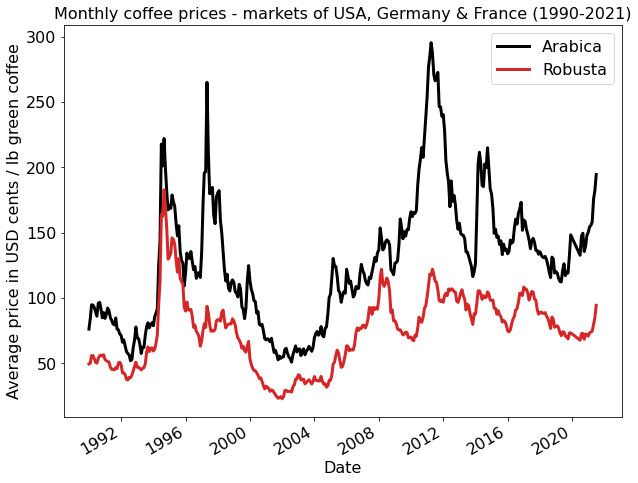

In [72]:
datatot['arabicas'].plot(figsize=(10,8), color='black', label='Arabica', linewidth=3);
datatot['robustas'].plot(figsize=(10,8), color='tab:red', label='Robusta', linewidth=3);
plt.legend(prop={'size':16});
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.title('Monthly coffee prices - markets of USA, Germany & France (1990-2021)', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/monthly_prices_arabicas_robustas.jpeg');

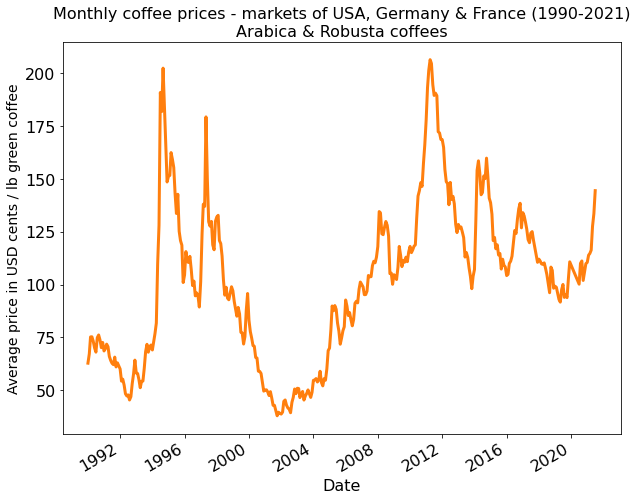

In [73]:
datatot['avg'].plot(figsize=(10,8), color='tab:orange', linewidth=3);
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.title('Monthly coffee prices - markets of USA, Germany & France (1990-2021)\nArabica & Robusta coffees', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/monthly_prices_avg.jpeg');

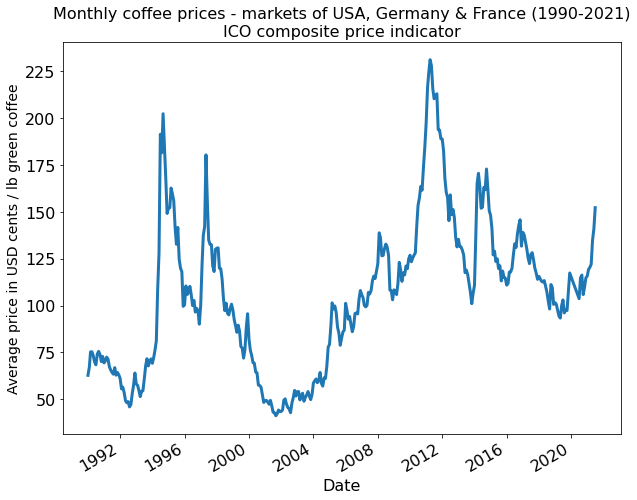

In [74]:
datatot['ICO_composite_indicator'].plot(figsize=(10,8), color='tab:blue', linewidth=3);
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.title('Monthly coffee prices - markets of USA, Germany & France (1990-2021)\nICO composite price indicator', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/monthly_prices_ico_composite.jpeg');

---